# The Stroop Effect Analysis 

The stroop effect is a a psychological phenonmenon where an interference is used, in this example it is colored font, to test the effect the interference on the subjects response.  The experiment, usually called the stroop effect test contains text that is colored in a specific manner (depending on the experimental design) the subject is then asked to read either the text or state out loud the color of the text.  The text and colors are used specifically to test the subject.  that is congruent, incongruent, and nuetral.  This analysis will look at a experiment performed to demonstrate the stroop effect.   

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats
from scipy.stats import ttest_ind
from math import sqrt
from scipy.stats import t

In [2]:
stroop_df=pd.read_csv("stroopdata.csv")

In the experiment in this analysisis presented a list of words.  The color of the font will vary depending two conditions of the experiment: congruent, the words displayed are color words whose names match the colors in which they are printed, and incongruent, the words displayed are different color words that do not match the colors printed.   The participant is timed while she/he reads through the list of colored words out loud. 

In [3]:
stroop_df.head(10)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Looking at the first 10 samples of the data it seems, independant variable is whether the colored word and whether it is incongruent or congruent.   The dependant variable is the time it takes to read the list of words outloud.   To understand the data further I would like to look at the descriptive statistics and the distribution of the data. 

In [4]:
stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In the incongruent sample the mean time it took the participant read out loud all of the words was 22.0 secoconds where as in the congruent sample it is 14.1 seconds.  One interesting data point is the stanadard deviation.  The standard deviation for the congruent data is 3.56 for congruent and 4.80 for incongruent.   Therefore, I expect that the incongruent data will have more dispersion then the congruent data.  To get a better look at the distribution I would like to create boxplot of the time. 

In [5]:
congruentsample=stroop_df['Congruent']
incongruentsample=stroop_df['Incongruent']

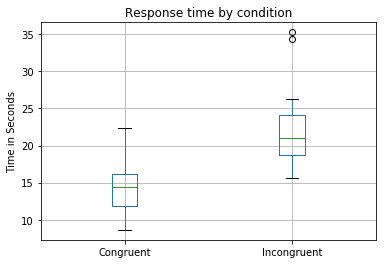

In [24]:
#The times in the sample boxplot. 
stroop_df.boxplot()
plt.ylabel('Time in Seconds')
plt.title('Response time by condition')
plt.show()

The distribution is interesting in both samples. There are a couple of participants who have a time of over 30 seconds in the incongruent samples whereas there are some in the congruent sample.  It's interesting that the congruent samples has a wider distribution but no outliers whereas the incongruent sample has a narrower distribution with a few outlers.   

To confirm and draw inferences about the stroop effect we can perform a hypothesis test on this sample. The t-test is most appropriate for this sample because the small size of the sample (24), the population data is unavailable, and the distribution is relatively dispersed when considering the sample size.  Additionally, the same person completes both the congruent and incongruent test, so the dependant t-test is the most appropriate statistical test for this sample.

The Null Hypothesis for the T-test is there is no significant difference between the congruent and incongruent sample times.

The Alternative Hypothesis is that there is a significant difference between the congruent and incongruent sample times.  

With an alpha level of 5%. 

In mathematical terms the Hypothesis is: 
H0:µcongruent=µincongruent
H1:µcongruent≠µincongruent
α = .05

The criticial values for the t test are +/- 2.069.   

In [8]:
#Performing a ttest comparing the two samples 
t=stats.ttest_rel(stroop_df['Incongruent'], stroop_df['Congruent'])
print (t)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)


The t statistic is well above the critical value at 8.02.   The pvalue is less than .0001.  Therefore we would reject the null at an alpha level of .05.  

In [17]:
n = 24
mean_diff=stroop_df["Incongruent"].mean()-stroop_df['Congruent'].mean()
c_i_diff=stroop_df["Incongruent"]-stroop_df['Congruent']
std_diff=np.std(c_i_diff)


In [18]:
#The confidence interval for the true difference between the incongruent and congruent tests 
# Calculate the mean difference and 95% confidence interval

df = n-1
t_critical= 2.069 #Looked up from Chart 
std_error=std_diff/sqrt(n)
moe=t_critical*std_error

print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(mean_diff, mean_diff - moe, mean_diff + moe))



The difference between groups is 8.0 [6.0 to 10.0] (mean [95% CI])


Based on my calculations the 95% confidence interval is 6 to 10 seconds of difference between the congruent and incongruent data. Which is interesting.  The t-statistic was significant so this aids in the conclusion that we should reject the null hypothesis.   

In [20]:
r2=(t[0])**2/(t[0]**2+df)
print ('\nThe proportion of difference in time that can be attributed to congreunt or incongruent sample is {}'.format(r2))


The proportion of difference in time that can be attributed to congreunt or incongruent sample is 0.736636416144506


# Conclusions

Based on the data I found that there is a significant difference between the congruent and incongruent times for participants in the experiment sample provided.  Incongruent times are significantly slower than congruent times. With a pvalue of less than .0001 and a t-statistic of 8.02 I rejected the null hypothesis, that stated the congruent and incongruent tests would be similar.  The 95% confidence interval for the mean difference between the two samples is 6 and 10 seconds.   Further the R^2 of .74 shows that a large portion of the time difference can explained by sample being congruent or incongruent.  

The stroop effect is used to demonstrate selective attention. In this sample, the interference is correlated by about 74% to the participants delayed time.    While there seems to be a correlation betweeen the sample type and the results it's difficult to prove causation without further experimentation and information about the sample and experimental design. 

